<a href="https://colab.research.google.com/github/reitezuz/18NES1-2025-/blob/main/week4/perceptron_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Motivation: A Layer of perceptrons
- the whole layer is represented by a weight matrix W and a bias vector b
- the training set also consists of two matrices: X (inputs) and D (true outputs)

In [1]:
import numpy as np
N = 4 # number of samples
n = 2 # number of features
m = 5 # number of neurons

# Layer of perceptrons:
W = np.random.uniform(-1,1,(n,m)) # weight matrix (n,m)
b = np.random.uniform(-1,1,(1,m)) # bias vector (1,m)

# Training set:
X = np.random.uniform(-1,1,(N,n)) # input matrix (N,n)
D = np.random.uniform(-1,1,(N,m)) # desired output matrix (N,m)

print("W:", W, sep="\n")
print("b:", b, sep="\n")
print("X:", X, sep="\n")
print("D:", D, sep="\n")


W:
[[ 0.91615568 -0.88780815 -0.89701872 -0.65686032  0.10187819]
 [ 0.02715326  0.68784006 -0.68283137  0.77813749 -0.08011743]]
b:
[[-0.31685866  0.75450983  0.41215074  0.67664576  0.74855182]]
X:
[[ 0.38019584 -0.38034449]
 [ 0.90270924 -0.00504892]
 [ 0.87173987 -0.21426581]
 [ 0.38273389  0.00951472]]
D:
[[ 0.71585566  0.04812708  0.7497986   0.06198112 -0.40385337]
 [-0.26671445 -0.90528225  0.70040177 -0.1209964   0.7990946 ]
 [ 0.97140056 -0.83234532 -0.34159203  0.06717558 -0.166911  ]
 [-0.66890525 -0.28697524 -0.70191664 -0.62138652 -0.78354856]]


- the model is able to compute the potential and output for the whole dataset at once:

In [2]:
# Potential:
Xi = X @ W + b             # (N, m)

# Output (for tanh and sigmoid):
Y = np.tanh(Xi)            # (N, m) ... tanh
Y1 = 1 / (1 + np.exp(-Xi)) # (N, m) ... sigmoid

# At once:
Y = np.tanh(X @ W + b)     # (N, m)
Y1 = 1 / (1 + np.exp(-(X @ W + b))) # (N, m)

print("Xi:", Xi, sep="\n")
print("Y (tanh):", Y, sep="\n")
print("Y1 (sigmoid):", Y1, sep="\n")


Xi:
[[ 0.02113233  0.15535269  0.33081911  0.13094989  0.81775771]
 [ 0.51002644 -0.05039564 -0.39414878  0.07976313  0.84092271]
 [ 0.47597276 -0.16680854 -0.22350882 -0.06269383  0.85452953]
 [ 0.03404352  0.42126017  0.06233434  0.43264682  0.78678176]]
Y (tanh):
[[ 0.02112918  0.15411485  0.31925659  0.13020648  0.67384759]
 [ 0.4699658  -0.05035302 -0.37493134  0.07959441  0.68629748]
 [ 0.44301254 -0.16527841 -0.21985984 -0.06261182  0.6934284 ]
 [ 0.03403037  0.39799153  0.06225373  0.40753092  0.65658205]]
Y1 (sigmoid):
[[0.50528289 0.53876025 0.58195866 0.53269077 0.69376016]
 [0.62481267 0.48740376 0.40271897 0.51993022 0.69865951]
 [0.61679645 0.45839429 0.44435426 0.48433167 0.70151645]
 [0.50851006 0.60378476 0.51557854 0.60650553 0.68713989]]


- one step of the iterative algorithm:

In [3]:
i = 0                     # index of current pattern
x =  X[i,:].reshape(1,-1) # input pattern (1,n)
d = D[i,:].reshape(1,-1)  # real output (1,m)

# Compute the predicted output (for all perceptrons at once)
y = np.tanh(x @ W + b)    #  (1,m)

# Compute the weight and bias changes  (for all perceptrons at once)
tanh_derivative = 1 - y ** 2                   # (1,m)
sigmoid_derivative = y * (1 - y)               # (1,m)
W_change = x.T @ (tanh_derivative * (d - y))   # (n,1) @ (1,m) -> (n,m)
b_change = tanh_derivative * (d - y)           # (1,m) * (1,m) -> (1,m)

# Change the weights and biases:
W += W_change
b += b_change

print(f"x: {x.shape}\n{x}")
print(f"d: {d.shape}\n{d}")
print(f"y: {y.shape}\n{y}")
print(f"W_change: {W_change.shape}\n{W_change}")
print(f"b_change: {b_change.shape}\n{b_change}")


x: (1, 2)
[[ 0.38019584 -0.38034449]]
d: (1, 5)
[[ 0.71585566  0.04812708  0.7497986   0.06198112 -0.40385337]]
y: (1, 5)
[[0.02112918 0.15411485 0.31925659 0.13020648 0.67384759]]
W_change: (2, 5)
[[ 0.2640142  -0.03933902  0.14700619 -0.02549923 -0.22368772]
 [-0.26411742  0.0393544  -0.14706367  0.0255092   0.22377517]]
b_change: (1, 5)
[[ 0.69441632 -0.10347041  0.38665912 -0.06706868 -0.58834866]]


- one step of the batch algorithm (even more efficient):

In [4]:
# Compute the predicted output (for all perceptrons and input patterns at once)
Y = np.tanh(X @ W + b)    #  (N,m)

# Compute the weight and bias changes  (for all perceptrons and input patterns at once)
tanh_derivative = 1 - Y ** 2                   # (N,m)
sigmoid_derivative = Y * (1 - Y)               # (N,m)
W_change = X.T @ (tanh_derivative * (D - Y))   # (n,N) @ (N,m) -> (n,m)
b_change = (tanh_derivative * (D - Y)).sum(axis=0).reshape(1, -1)  # (1,m)

# Change the weights and biases:
W += W_change
b += b_change

print(f"x: {x.shape}\n{x}")
print(f"d: {d.shape}\n{d}")
print(f"y: {y.shape}\n{y}")
print(f"W_change: {W_change.shape}\n{W_change}")
print(f"b_change: {b_change.shape}\n{b_change}")

x: (1, 2)
[[ 0.38019584 -0.38034449]]
d: (1, 5)
[[ 0.71585566  0.04812708  0.7497986   0.06198112 -0.40385337]]
y: (1, 5)
[[0.02112918 0.15411485 0.31925659 0.13020648 0.67384759]]
W_change: (2, 5)
[[-0.4764483  -1.23748287 -0.33910526 -0.22874977 -0.00525625]
 [-0.00734456  0.0914601   0.10060799 -0.06087631  0.20400785]]
b_change: (1, 5)
[[-0.94815353 -1.67797399 -0.90101066 -0.72579    -0.78990663]]


# Perceptron Layer with continuous activation function and the gradient descent training algorithm (minimizing the SSE error function)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import time

class PerceptronLayer:
    def __init__(self, input_dim, num_neurons, activation_function='linear', init_method='zero'):
        # Dimensions:
        # inputs: (number of samples, number of features) (N, n)
        # weights: (number of features, number of neurons) (n, m)
        # biases: (1, number of neurons) (1, m)

        # weight initialization
        if init_method == 'random':
            self.weights = np.random.uniform(-1, 1, (input_dim, num_neurons)) / 10  # (number of features, number of neurons)
            self.biases = np.random.uniform(-1, 1, (1, num_neurons)) / 10  # (1, number of neurons)
        elif init_method == 'widrow-hoff':
            self.weights = np.random.randn(input_dim, num_neurons) * (2 / np.sqrt(input_dim))  # (number of features, number of neurons)
            self.biases = np.random.randn(1, num_neurons) * (2 / np.sqrt(input_dim))  # (1, number of neurons)
        else: # zeros
            self.weights = np.zeros((input_dim, num_neurons))  # (number of features, number of neurons)
            self.biases = np.zeros((1, num_neurons))  # (1, number of neurons)

        self.activation_function = activation_function
        self.epochs = -1

    def set_weights(self, weights, biases):
        self.weights = np.array(weights, dtype=float).reshape(self.weights.shape)  # (number of features, number of neurons)
        self.biases = np.array(biases, dtype=float).reshape(1, -1)  # (1, number of neurons)

    def __str__(self):
        return f"PerceptronLayer(weights={self.weights.shape}, biases={self.biases.shape})"

    def activation(self, x):
        if self.activation_function == 'linear':
            return x
        elif self.activation_function == 'tanh':
            return np.tanh(x)
        elif self.activation_function == 'sigmoid':
            return 1 / (1 + np.exp(-x))
        else:
            raise ValueError("Unknown activation function")

    def forward(self, inputs):
        # Dimensions:
        # inputs: (number of samples, number of features)
        # weights: (number of features, number of neurons)
        # biases: (1, number of neurons)
        # output: (number of samples, number of neurons)
        potential = inputs @ self.weights + self.biases  # (number of samples, number of neurons)
        return self.activation(potential)  # (number of samples, number of neurons)

    def gradient_descent_iterative(self, training_inputs, true_outputs, learning_rate=1, epochs=100, adaptive_learning_rate=True, min_error=0, max_validation_steps=None, validation_set=None, print_progress=False, error_name='SSE'):
        learning_rate_0 = learning_rate
        training_errors = []
        validation_errors = []

        if print_progress:
            print("Gradient Descent Iterative:")

        if validation_set is not None:
            validation_inputs, validation_true_outputs = validation_set
            validation_steps = 0
            previous_validation_error = MSE_error(validation_true_outputs, self.forward(validation_inputs))

        for epoch in range(epochs):
            shuffled_indices = np.random.permutation(training_inputs.shape[0])
            training_inputs = training_inputs[shuffled_indices, :]
            true_outputs = true_outputs[shuffled_indices, :]


            for inputs, true_output in zip(training_inputs, true_outputs):
                inputs = inputs.reshape(1, -1)  # (1, number of features)
                true_output = true_output.reshape(1, -1)  # (1, number of neurons)
                prediction = self.forward(inputs)  # (1, number of neurons)
                error = true_output - prediction  # (1, number of neurons)

                if (self.activation_function == 'linear') or (error_name != 'SSE'):  # cross-entropy
                    grad = error  # (1, number of neurons)
                elif self.activation_function == 'tanh':
                    grad = error * (1 - prediction ** 2)  # (1, number of neurons)
                elif self.activation_function == 'sigmoid':
                    grad = error * prediction * (1 - prediction)  # (1, number of neurons)
                else:
                    raise ValueError("Unknown activation function")
                self.weights += learning_rate * inputs.T @ grad  # (number of features, number of neurons)
                self.biases += learning_rate * grad  # (1, number of neurons)

            if adaptive_learning_rate:
                learning_rate = learning_rate_0 / ((epoch//100 + 1) ** 0.5)

            if validation_set:
                validation_mse = MSE_error(validation_true_outputs, self.forward(validation_inputs))
                validation_ce = cross_entropy(validation_true_outputs, self.forward(validation_inputs))
                validation_errors.append(validation_mse)
                if validation_mse < previous_validation_error:
                    validation_steps = 0
                else:
                    validation_steps += 1
                previous_validation_error = validation_mse
            mse = MSE_error(true_outputs, self.forward(training_inputs))
            cross_entropy_error = cross_entropy(true_outputs, self.forward(training_inputs))
            if print_progress and epoch % 100 == 0:
                if validation_set:
                    print(f"Epoch: {epoch}, Training MSE: {mse:0.4f}, CE: {cross_entropy_error:.4f} Validation MSE: {validation_mse:0.4f} Validation CE: {validation_ce} Average of Weights: {np.mean(self.weights)}  Learning rate: {learning_rate:.4f}")
                else:
                    print(f"Epoch: {epoch}, MSE: {mse:0.4f} CE: {cross_entropy_error:.4f}  Average of Weights: {np.mean(self.weights)}  Learning rate: {learning_rate:.4f}")

            # Stop conditions:

            training_errors.append(mse)
            if (mse <= min_error):
                msg = "Minimum error reached."
                break
            elif (max_validation_steps and (validation_steps > max_validation_steps)):
                msg = "Maximum validation steps reached."
                break
            else:
                msg = "Maximum epochs reached."
        if print_progress:
            print(f"The training ended after {epoch+1} epochs.", msg)

        self.epochs = epoch + 1
        return training_errors, validation_errors

    def gradient_descent_batch(self, training_inputs, true_outputs, learning_rate=1, epochs=100, adaptive_learning_rate=True, min_error=0, max_validation_steps=None, validation_set=None, print_progress=False, error_name='SSE'):
        learning_rate_0 = learning_rate
        training_errors = []
        validation_errors = []

        if print_progress:
            print("Gradient Descent Batch:")

        if validation_set is not None:
            validation_inputs, validation_true_outputs = validation_set
            validation_steps = 0
            previous_validation_error = MSE_error(validation_true_outputs, self.forward(validation_inputs))

        for epoch in range(epochs):
            prediction = self.forward(training_inputs)  # (number of samples, number of neurons)
            error = true_outputs - prediction  # (number of samples, number of neurons)


            if (self.activation_function == 'linear') or (error_name != 'SSE'):  # cross-entropy
                grad = error  # (number of samples, number of neurons)
            elif self.activation_function == 'tanh':
                grad = error * (1 - prediction ** 2)  # (number of samples, number of neurons)
            elif self.activation_function == 'sigmoid':
                grad = error * prediction * (1 - prediction)  # (number of samples, number of neurons)
            else:
                raise ValueError("Unknown activation function")

            weight_gradient = (training_inputs.T @ grad) / training_inputs.shape[0]  # (number of features, number of neurons)
            bias_gradient = np.mean(grad, axis=0, keepdims=True)  # (1, number of neurons)

            self.weights += learning_rate * weight_gradient  # (number of features, number of neurons)
            self.biases += learning_rate * bias_gradient  # (1, number of neurons)

            if adaptive_learning_rate:
                learning_rate = learning_rate_0 / ((epoch + 1) ** 0.5)

            if validation_set:
                validation_mse = MSE_error(validation_true_outputs, self.forward(validation_inputs))
                validation_ce = cross_entropy(validation_true_outputs, self.forward(validation_inputs))
                validation_errors.append(validation_mse)
                if validation_mse < previous_validation_error:
                    validation_steps = 0
                else:
                    validation_steps += 1
                previous_validation_error = validation_mse

            mse = MSE_error(true_outputs, self.forward(training_inputs))
            cross_entropy_error = cross_entropy(true_outputs, self.forward(training_inputs))
            training_errors.append(mse)
            if print_progress and epoch % 100 == 0:
                if validation_set:
                    print(f"Epoch: {epoch}, Training MSE: {mse:0.4f}, CE: {cross_entropy_error:.4f} Validation MSE: {validation_mse:0.4f} Validation CE: {validation_ce} Average of Weights: {np.mean(self.weights)}  Learning rate: {learning_rate:.4f}")
                else:
                    print(f"Epoch: {epoch}, MSE: {mse:0.4f} CE: {cross_entropy_error:.4f}  Average of Weights: {np.mean(self.weights)}  Learning rate: {learning_rate:.4f}")

            # Stop conditions:
            if (mse <= min_error):
                msg = "Minimum error reached."
                break
            elif (max_validation_steps and validation_steps > max_validation_steps):
                msg = "Maximum validation steps reached."
                break
            else:
                msg = "Maximum epochs reached."
        if print_progress:
            print(f"The training ended after {epoch+1} epochs.", msg)

        self.epochs = epoch + 1
        return training_errors, validation_errors


def sign(x):
    return np.where(x > 0, 1, np.where(x < 0, -1, 0))

def ensure_same_dimensions(true_outputs, predicted_outputs):
    true_outputs = np.asarray(true_outputs)           # ensure array
    predicted_outputs = np.asarray(predicted_outputs)
    true_outputs = true_outputs.reshape(1, -1) if true_outputs.ndim == 1 else true_outputs
    predicted_outputs = predicted_outputs.reshape(1, -1) if predicted_outputs.ndim == 1 else predicted_outputs

    if true_outputs.shape != predicted_outputs.shape:
        raise ValueError(f"Shape mismatch: {true_outputs.shape} vs {predicted_outputs.shape}")
    return true_outputs, predicted_outputs

def perceptron_error(true_outputs, predicted_outputs):
    true_outputs, predicted_outputs = ensure_same_dimensions(true_outputs, predicted_outputs)
    return np.sum(true_outputs != np.round(predicted_outputs))

def SSE_error(true_outputs, predicted_outputs):
    true_outputs, predicted_outputs = ensure_same_dimensions(true_outputs, predicted_outputs)
    return np.sum((true_outputs - predicted_outputs) ** 2)

def SAE_error(true_outputs, predicted_outputs):
    rue_outputs, predicted_outputs = ensure_same_dimensions(true_outputs, predicted_outputs)
    return np.sum(np.abs(true_outputs - predicted_outputs))

def MAE_error(true_outputs, predicted_outputs):
    true_outputs, predicted_outputs = ensure_same_dimensions(true_outputs, predicted_outputs)
    return np.mean(np.abs(true_outputs - predicted_outputs))

def MSE_error(true_outputs, predicted_outputs):
    true_outputs, predicted_outputs = ensure_same_dimensions(true_outputs, predicted_outputs)
    return np.mean((true_outputs - predicted_outputs) ** 2)

def RMSE_error(true_outputs, predicted_outputs):
    true_outputs, predicted_outputs = ensure_same_dimensions(true_outputs, predicted_outputs)
    return np.sqrt(np.mean((true_outputs - predicted_outputs) ** 2))

import numpy as np

def accuracy(true_outputs, predicted_outputs):
    """
    Computes accuracy for classification with real-valued outputs (and for bipolar true outputs).

    Parameters:
    - true_outputs: ndarray of shape (N, m), one-hot encoded true labels (for multi-class)
    - predicted_outputs: ndarray of shape (N, m), real-valued predictions (probabilities or scores)

    Returns:
    - Scalar: Accuracy (proportion of correctly classified samples)
    """
    true_outputs, predicted_outputs = ensure_same_dimensions(true_outputs, predicted_outputs)

    if true_outputs.shape[1] == 1:  # Binary classification (1 neuron)
        predicted_labels = (predicted_outputs >= 0.0).astype(int) *2 - 1 # Convert probabilities to -1/1 using thresholding
    else:  # Multi-class classification (m > 1)
        predicted_labels = np.argmax(predicted_outputs, axis=1)  # Get index of the highest probability
        true_outputs = np.argmax(true_outputs, axis=1)  # Convert one-hot encoding to class indices

    return np.mean(predicted_labels == true_outputs)  # Compute the proportion of correctly classified samples

def misclassified_indices(true_outputs, predicted_outputs):
    """
    Identifies indices of misclassified samples in classification with real-valued outputs.

    Parameters:
    - true_outputs: ndarray of shape (N, m), one-hot encoded true labels (for multi-class)
    - predicted_outputs: ndarray of shape (N, m), real-valued predictions (probabilities or scores)

    Returns:
    - misclassified_indices: ndarray of shape (K,), indices of misclassified samples
    """
    true_outputs, predicted_outputs = ensure_same_dimensions(true_outputs, predicted_outputs)

    if true_outputs.shape[1] == 1:  # Binary classification (1 neuron)
        predicted_labels = (predicted_outputs >= 0.0).astype(int) *2 - 1 # Convert to -1/1
    else:  # Multi-class classification (m > 1)
        predicted_labels = np.argmax(predicted_outputs, axis=1)  # Get predicted class index
        true_outputs = np.argmax(true_outputs, axis=1)  # Convert one-hot encoding to class indices

    misclassified = np.where(predicted_labels != true_outputs)[0]  # Get indices of incorrect predictions

    return misclassified

def cross_entropy(true_outputs, predicted_probabilities, epsilon=1e-12):
    """
    Computes categorical cross-entropy loss for one-hot encoded labels.

    Parameters:
    - true_outputs: ndarray of shape (N, m), one-hot encoded true labels.
    - predicted_probabilities: ndarray of shape (N, m), predicted probabilities.
    - epsilon: Small value to prevent log(0) issues.

    Returns:
    - Mean cross-entropy loss (scalar)
    """
    true_outputs, predicted_outputs = ensure_same_dimensions(true_outputs, predicted_probabilities)

    # Check if we need to apply activation functions
    if predicted_outputs.shape[1] == 1:  # Binary classification: apply sigmoid
        predicted_outputs = 1 / (1 + np.exp(-predicted_outputs))  # Sigmoid function
    else:  # Multi-class classification: apply softmax
        exp_outputs = np.exp(predicted_outputs - np.max(predicted_outputs, axis=1, keepdims=True))  # Stability trick
        predicted_outputs = exp_outputs / np.sum(exp_outputs, axis=1, keepdims=True)


    # Avoid log(0)
    predicted_outputs = np.clip(predicted_outputs, epsilon, 1.0 - epsilon)

    # Cross-entropy loss (averaged over patterns)
    return -np.mean(np.sum(true_outputs * np.log(predicted_outputs), axis=1))


In [6]:
# test of dimensions
p = PerceptronLayer(n,m,activation_function='tanh',init_method='random')
print(p)
X = np.random.uniform(-1,1,(N,n))
D = np.random.uniform(-1,1,(N,m))
Y = p.forward(X)
print(Y, Y.shape, sep="\n")

x = np.random.uniform(-1,1,(1,n))
d = np.random.uniform(-1,1,(1,m))
y = p.forward(x)
print(y, y.shape, sep="\n")

PerceptronLayer(weights=(2, 5), biases=(1, 5))
[[-0.03865273 -0.03055232  0.06644252  0.04325514  0.03629051]
 [ 0.08971184 -0.05962736  0.09299294  0.12018745 -0.09789328]
 [ 0.16043061 -0.06955236  0.10397064  0.13335677 -0.1715266 ]
 [ 0.03038365 -0.02840721  0.06993621  0.00059973 -0.03552749]]
(4, 5)
[[-0.08292736 -0.03531608  0.06624798  0.08658038  0.08228583]]
(1, 5)


### Axiliary functions:


In [7]:
def run_example_multiple_times_classification(experiment_results, training_data, testing_data, testing_data2, validation_data, activation, epochs, init_method, learning_rate, print_progress, variant, data_description, adaptive_learning_rate, min_error, error_name, max_validation_steps=10, num_runs=10):
    inputs, true_outputs = training_data
    if testing_data is None:
        testing_data = training_data
    if testing_data2 is None:
        testing_dat2 = testing_data
    max_validation_steps = None if validation_data is None else max_validation_steps
    test_inputs, test_true_outputs = testing_data
    test_inputs2, test_true_outputs2 = testing_data2
    times = []
    mse_errors = []
    accuracy_errors = []
    mse_test_errors = []
    accuracy_test_errors = []
    mse_test_errors2 = []
    accuracy_test_errors2 = []
    epoch_counts = []

    for _ in range(num_runs):

        start_time = time.time()
        neuron = PerceptronLayer(inputs.shape[1], true_outputs.shape[1], activation, init_method)

        if variant == 'iterative':
            [training_errors, validation_errors] = neuron.gradient_descent_iterative(inputs, true_outputs, learning_rate, epochs, adaptive_learning_rate, min_error, max_validation_steps, validation_data, print_progress, error_name)
        else:
            [training_errors, validation_errors] =     neuron.gradient_descent_batch(inputs, true_outputs, learning_rate, epochs, adaptive_learning_rate, min_error, max_validation_steps, validation_data, print_progress, error_name)

        end_time = time.time()
        elapsed_time = end_time - start_time

        real_outputs = neuron.forward(inputs)
        mse = MSE_error(true_outputs, real_outputs)
        acc = accuracy(true_outputs, real_outputs)

        real_outputs = neuron.forward(test_inputs)
        mse_test = MSE_error(test_true_outputs, real_outputs)
        acc_test = accuracy(test_true_outputs, real_outputs)

        recalled_outputs = neuron.forward(test_inputs2)
        mse_test2 = MSE_error(test_true_outputs2, real_outputs)
        acc_test2 = accuracy(test_true_outputs2, real_outputs)

        times.append(elapsed_time)
        mse_errors.append(mse)
        accuracy_errors.append(acc)
        mse_test_errors.append(mse_test)
        accuracy_test_errors.append(acc_test)
        mse_test_errors2.append(mse_test2)
        accuracy_test_errors2.append(acc_test2)
        epoch_counts.append(neuron.epochs)

    avg_time = np.mean(times)
    avg_mse = np.mean(mse_errors)
    avg_mse_test = np.mean(mse_test_errors)
    avg_acc = np.mean(accuracy_errors)
    acc_sum = np.sum(np.array(accuracy_errors) > 0.98)
    avg_acc_test = np.mean(accuracy_test_errors)
    avg_mse_test2 = np.mean(mse_test_errors2)
    avg_acc_test2 = np.mean(accuracy_test_errors2)
    avg_epochs = np.mean(epoch_counts)

    results = {
        'Epochs': avg_epochs,
        'MSE': avg_mse,
        'Accuracy': avg_acc,
        'Test MSE': avg_mse_test,
        'Test Accuracy': avg_acc_test,
        'Sum Accuracy': acc_sum,
        'Test MSE2': avg_mse_test2,
        'Test Accuracy2': avg_acc_test2,
        'Time': avg_time,
        'Variant': variant,
        'Learning Rate': learning_rate,
        'Adaptive Learning Rate': adaptive_learning_rate,
        'Activation Function': activation,
        'Init Method': init_method,
        'Max Epochs': epochs,
        'Data Description': data_description,

    } #experiment_results_r = pd.DataFrame(columns=['MSE', 'SSE', 'Test MSE' 'Test MAE', 'Epochs', 'Time', 'Variant', 'Learning Rate', 'Max Epochs', 'Weights', 'Bias', 'Data Description'])

    experiment_results.loc[len(experiment_results)] = results

    if num_runs == 1:
         plot_error_progress(training_errors, validation_errors)
    return neuron

def run_example_multiple_times_regression(experiment_results, training_data, testing_data, validation_data, activation, epochs, init_method, learning_rate, print_progress, variant, data_description, adaptive_learning_rate, min_error, max_validation_steps=10, num_runs=10):
    inputs, true_outputs = training_data
    if testing_data is None:
        testing_data = training_data
    max_validation_steps = None if validation_data is None else max_validation_steps
    test_inputs, test_true_outputs = testing_data
    times = []
    mse_errors = []
    mae_errors = []
    mse_test_errors = []
    mae_test_errors = []
    epoch_counts = []

    for _ in range(num_runs):

        start_time = time.time()
        neuron = PerceptronLayer(inputs.shape[1], true_outputs.shape[1], activation, init_method)

        if variant == 'iterative':
            [training_errors, validation_errors] = neuron.gradient_descent_iterative(inputs, true_outputs, learning_rate, epochs, adaptive_learning_rate, min_error, max_validation_steps, validation_data, print_progress)
        else:
            [training_errors, validation_errors] = neuron.gradient_descent_batch(inputs, true_outputs, learning_rate, epochs, adaptive_learning_rate, min_error, print_progress, print_progress=print_progress)

        end_time = time.time()
        elapsed_time = end_time - start_time

        real_outputs = neuron.forward(inputs)
        mse = MSE_error(true_outputs, real_outputs)
        mae = MAE_error(true_outputs, real_outputs)

        real_outputs = neuron.forward(test_inputs)
        mse_test = MSE_error(test_true_outputs, real_outputs)
        mae_test = MAE_error(test_true_outputs, real_outputs)

        times.append(elapsed_time)
        mse_errors.append(mse)
        mae_errors.append(mae)
        mse_test_errors.append(mse_test)
        mae_test_errors.append(mae_test)
        epoch_counts.append(neuron.epochs)

    avg_time = np.mean(times)
    avg_mse = np.mean(mse_errors)
    avg_mae = np.mean(mae_errors)
    avg_test_mse = np.mean(mse_test_errors)
    avg_test_mae = np.mean(mae_test_errors)
    avg_epochs = np.mean(epoch_counts)

    results = {
        'Epochs': avg_epochs,
        'MSE': avg_mse,
        'MAE': avg_mae,
        'Test MSE': avg_test_mse,
        'Test MAE': avg_test_mae,
        'Time': avg_time,
        'Variant': variant,
        'Learning Rate': learning_rate,
        'Max Epochs': epochs,
        'Weights': neuron.weights,  # Note: Weights and bias are from the last run.
        'Bias': neuron.bias,
        'Data Description': data_description
    } #experiment_results_r = pd.DataFrame(columns=['MSE', 'SSE', 'Test MSE' 'Test MAE', 'Epochs', 'Time', 'Variant', 'Learning Rate', 'Max Epochs', 'Weights', 'Bias', 'Data Description'])

    experiment_results.loc[len(experiment_results)] = results

    if num_runs == 1:
         plot_error_progress(training_errors, validation_errors)
    return neuron

def plot_error_progress(train_errors, validation_errors):
    fig = plt.figure(figsize=(4, 3))
    if validation_errors:
        plt.plot(validation_errors, label='Validation Error')
    plt.plot(train_errors, label='Train Error')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.title('Validation and Train Error Progress')
    plt.legend()
    plt.grid(True)
    plt.show()


def one_hot_encode(d, num_classes=None):
    """
    Converts a vector of class labels (N,1) into a one-hot encoded matrix (N, m) using NumPy.

    Parameters:
    - d: ndarray of shape (N, 1) or (N,), containing class indices (0 to m-1)
    - num_classes: int, total number of classes (if None, inferred from max value in d)

    Returns:
    - one_hot: ndarray of shape (N, m), where each row is a one-hot vector
    """
    d = np.asarray(d).reshape(-1)  # Convert (N,1) to (N,) if necessary

    if num_classes is None:
        num_classes = np.max(d) # Infer number of classes if not provided

    return np.eye(num_classes)[d-1] * 2 - 1 # Efficient one-hot encoding




# Example 1: Gallblader attack
- now, we train three tasks at once:
    1. Gallblader attack
    2. Egg Salad
    3. Majority Circuit

In [8]:
def example_gallblader_attack():
    # Egg Salad, Pork Belly, Medicines -> Gallbladder Attack
    inputs = np.array([
        [+1, -1, -1],
        [+1, -1, +1],
        [-1, +1, -1],
        [-1, +1, +1],
        [+1, +1, -1],
        [+1, +1, +1]
    ])

    true_outputs = np.array([
        [+1, +1, -1],
        [-1, +1, -1],
        [+1, -1, -1],
        [-1, -1,   1],
        [+1, +1, -1],
        [+1, +1,  1]
    ])
    return inputs, true_outputs

- Observe that the perceptron layer manages to learn two tasks at once
- experiment with the hyperparameters

(6, 3) (6, 3)
Gradient Descent Iterative:
Epoch: 0, MSE: 0.2092 CE: -1.3724  Average of Weights: 0.2892096191105179  Learning rate: 0.5000
The training ended after 50 epochs. Maximum epochs reached.
PerceptronLayer(weights=(3, 3), biases=(1, 3))
Perceptron error: 0
MAE error: 0.03449032496480348
MSE error: 0.0016773376648406531


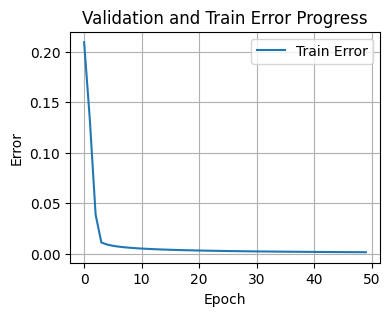

,Input,Predicted,True
0,"[1, -1, -1]","[[0.9644720842842355, 0.9960951878047236, -0.9...","[1, 1, -1]"
1,"[1, -1, 1]","[[-0.9417304189374615, 0.9969995567879163, -0....","[-1, 1, -1]"
2,"[-1, 1, -1]","[[0.9644670789474143, -0.9725925872024015, -0....","[1, -1, -1]"
3,"[-1, 1, 1]","[[-0.9417385320813688, -0.9644625824017364, 0....","[-1, -1, 1]"
4,"[1, 1, -1]","[[0.9999624270640619, 0.9647700321874189, -0.9...","[1, 1, -1]"
5,"[1, 1, 1]","[[0.933084414083815, 0.9728306735300115, 0.942...","[1, 1, 1]"


In [9]:
# Data and parameters:
inputs, true_outputs = example_gallblader_attack()
data_description = "Gallbladder Attack"
print(inputs.shape, true_outputs.shape)

# set parameters:
print_progress = True
activation = 'tanh'
learning_rate = 0.5
init_method = 'random'
adaptive_learning_rate = False
min_error = 0.0001
epochs = 50
variant = "iterative"
validation_data = None
max_validation_steps = None

# run the experiment:

# Train the linear neuron:
perceptron = PerceptronLayer(inputs.shape[1], true_outputs.shape[1], activation, init_method)


if variant == 'iterative':
    [training_errors, validation_errors] = perceptron.gradient_descent_iterative(inputs, true_outputs, learning_rate, epochs, adaptive_learning_rate, min_error, max_validation_steps, validation_data, print_progress)
else:
    [training_errors, validation_errors] = perceptron.gradient_descent_batch(inputs, true_outputs, learning_rate, epochs, adaptive_learning_rate, min_error, max_validation_steps, validation_data, print_progress)


# Print summary:
print(perceptron)
real_outputs = perceptron.forward(inputs) # forward for the whole dataset
error = perceptron_error(true_outputs, real_outputs)
print(f"Perceptron error: {error}")
print(f"MAE error: {MAE_error(true_outputs, real_outputs)}")
print(f"MSE error: {MSE_error(true_outputs, real_outputs)}")
plot_error_progress(training_errors, validation_errors)


# Create a pandas DataFrame for a nice table
import pandas as pd
df = pd.DataFrame(columns=['Input', 'Predicted', 'True'])
for inputs, label in zip(inputs, true_outputs):
    df.loc[len(df)] = {'Input': inputs, 'Predicted': perceptron.forward(inputs), 'True': label}
df.round(2)


In [10]:
perceptron.weights, perceptron.biases


(array([[ 1.71745957,  2.07438097, -0.1971707 ],
        [ 1.71742372, -0.55387626,  1.72471233],
        [-1.87972868,  0.06597566,  1.95845248]]),
 array([[ 0.12656551,  0.55608766, -1.72277109]]))

# Example:  Letters
#### Dataset Description:
The dataset consists of 78 black and white images of letters represented as numerical arrays.
Each image is a 50x50 grid where pixel values are either -1 (black) or 1 (white).
- The first column in the dataset contains the class label, which represents the letter index (1-26).
- The remaining columns contain pixel values for the respective image.

In [11]:
# load the perceptron_library.py file into google colab
import urllib.request

url = 'https://raw.githubusercontent.com/reitezuz/18NES1-2025-/refs/heads/main/week2/perceptron_library.py'
filename = 'perceptron_library.py'
urllib.request.urlretrieve(url, filename)


('perceptron_library.py', <http.client.HTTPMessage at 0x7f9730467410>)

In [12]:
# import libraries
#from perceptron_library import *
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt


In [13]:
def load_letter_data():
    """ Load letter image data from a CSV file hosted on GitHub into numpy arrays """
    github_url = "https://github.com/reitezuz/18NES1-2025-/blob/cd9bb8168f96cb0c35a6502c0d1b3874113c24ae/week2/letters.csv"
    url = github_url.replace("github.com", "raw.githubusercontent.com").replace("blob/", "")
    df = pd.read_csv(url, header=None)
    labels = df.iloc[:, 0].values   # First column is the class label
    inputs = df.iloc[:, 1:].values  # Remaining columns are features (-1, 1)
    return inputs, labels

def visualize_letter(X, labels, index):
    """ Visualize the i-th row of the data as a 50x50 black and white image """
    image = - X[index].reshape(50, 50)  # Reshape to 50x50
    letter = label_to_letter(labels[index])
    plt.figure(figsize=(2,2))         # Figure size
    plt.imshow(image, cmap='gray', vmin=-1, vmax=1)
    plt.title(f"Letter Image at Index {index} ... {letter}")
    plt.axis('off')
    plt.show()

def label_to_letter(label):
    """ Convert a label (1-26) to a corresponding letter (A-Z) """
    return chr(label + 64)

def add_noise(X, alpha=0.01):
    """ Add salt & pepper noise to the dataset and apply median filtering """
    from scipy.ndimage import median_filter
    X = (X + 1) / 2  # Convert from [-1,1] to [0,1]
    X_noisy = X.copy()
    X_denoised = X.copy()

    for i in range(X.shape[0]):
        img = X[i].reshape(50, 50)

        # Add salt & pepper noise
        noisy_img = img.copy()
        noise = np.random.choice([0, 1, -1], size=img.shape, p=[1 - alpha, alpha / 2, alpha / 2])
        noisy_img[noise == -1] = 0  # Salt (white)
        noisy_img[noise == 1] = 1   # Pepper (black)

        # Apply median filter
        denoised_img = median_filter(noisy_img, size=3)

        # Flatten back to vector form
        X_noisy[i] = noisy_img.flatten()
        X_denoised[i] = denoised_img.flatten()

    X_noisy = X_noisy * 2 - 1  # Convert back to [-1,1]
    X_denoised = X_denoised * 2 - 1  # Convert back to [-1,1]

    return X_noisy, X_denoised

def show_noisy_and_denoised(X_original, X_noisy, X_denoised, index):
    """ Display original, noisy, and denoised images side by side """
    fig, axes = plt.subplots(1, 3, figsize=(10, 5))

    original_img = - X_original[index].reshape(50, 50)
    noisy_img = - X_noisy[index].reshape(50, 50)
    denoised_img = - X_denoised[index].reshape(50, 50)

    axes[0].imshow(original_img, cmap='gray', vmin=-1, vmax=1)
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    axes[1].imshow(noisy_img, cmap='gray', vmin=-1, vmax=1)
    axes[1].set_title("Noisy Image")
    axes[1].axis('off')

    axes[2].imshow(denoised_img, cmap='gray', vmin=-1, vmax=1)
    axes[2].set_title("Denoised Image")
    axes[2].axis('off')

    plt.show()


### Analyze the data:

In [14]:
# Load the data:
[inputs, labels] = load_letter_data()

print(np.shape(inputs), np.shape(labels))
print(np.max(inputs), np.min(inputs), np.max(labels), np.min(labels))



(78, 2500) (78,)
1 -1 26 1


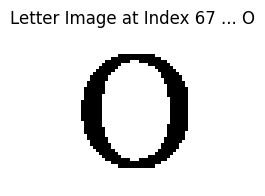

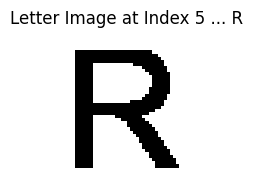

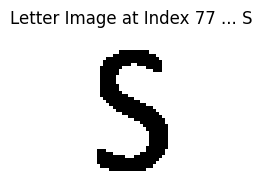

In [15]:
# Visualize some letters:
indexes = [67, 5, 77]
for index in indexes:
    visualize_letter(inputs, labels, index)


Create the testing set by adding noise and denoising:
- experiment with the level of noise, alpha

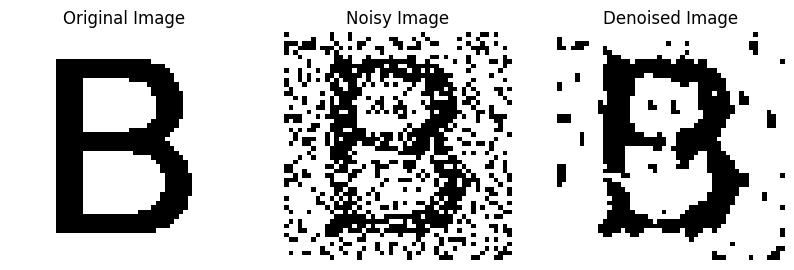

In [16]:
[inputs_noisy, inputs_denoised] = add_noise(inputs, alpha=0.5)
index = 10
show_noisy_and_denoised(inputs, inputs_noisy, inputs_denoised, index)

## Train the Perceptron layer to recognize letters

In [17]:
# DataFrame to store the results for comparisons
experiment_results_let = pd.DataFrame(columns=['Epochs', 'MSE', 'Accuracy','Sum Accuracy', 'Test MSE', 'Test Accuracy', 'Test MSE2', 'Test Accuracy2', 'Time', 'Variant', 'Learning Rate', 'Adaptive Learning Rate', 'Activation Function', 'Init Method', 'Max Epochs', 'Data Description'])

### 5 letters

- at first we train a small number of letters
- set the parametrers, run the experiment and observe the results:
- observe the characteristic shape of the error progress (for SSE)

Gradient Descent Iterative:
Epoch: 0, MSE: 1.3535 CE: -6.6758  Average of Weights: 9.301338135714195e-05  Learning rate: 0.0010
Epoch: 100, MSE: 0.3722 CE: -7.1573  Average of Weights: 0.0012553884037067493  Learning rate: 0.0010
Epoch: 200, MSE: 0.1603 CE: -8.3262  Average of Weights: 0.0011465067228065933  Learning rate: 0.0010
Epoch: 300, MSE: 0.1602 CE: -8.3441  Average of Weights: 0.0011777566434101397  Learning rate: 0.0010
Epoch: 400, MSE: 0.1601 CE: -8.3527  Average of Weights: 0.001194247104984528  Learning rate: 0.0010
Epoch: 500, MSE: 0.1601 CE: -8.3582  Average of Weights: 0.0012045413327476506  Learning rate: 0.0010
Epoch: 600, MSE: 0.1601 CE: -8.3621  Average of Weights: 0.0012105474958713513  Learning rate: 0.0010
Epoch: 700, MSE: 0.1601 CE: -8.3650  Average of Weights: 0.0012125735792402187  Learning rate: 0.0010
Epoch: 800, MSE: 0.1600 CE: -8.3673  Average of Weights: 0.001208537351272446  Learning rate: 0.0010
Epoch: 900, MSE: 0.1599 CE: -8.3687  Average of Weights: 0

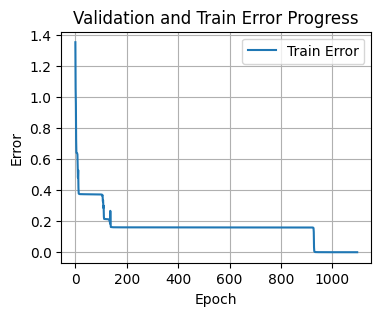


Experiment Results:


,Epochs,MSE,Accuracy,Sum Accuracy,Test MSE,Test Accuracy,Test MSE2,Test Accuracy2,Time,Variant,Learning Rate,Adaptive Learning Rate,Activation Function,Init Method,Max Epochs,Data Description
0,1098.0,0.0001,1.0,1,0.431522,0.733333,0.431522,0.733333,4.660417,iterative,0.001,False,tanh,random,5000,Letter classification


In [18]:
alpha = 0.3       # level of noise in the testing data

np.random.seed(47876)
# Preprocess the data:
[inputs, labels] = load_letter_data()

mask = (labels == 1) | (labels == 2) | (labels == 3) | (labels == 4)| (labels == 5)  # we train just 5  letters
inputs = inputs[mask]
labels = labels[mask]

[inputs_noisy, inputs_denoised] = add_noise(inputs, alpha=alpha)
true_outputs = one_hot_encode(labels)
training_data = (inputs, true_outputs)


testing_data = (inputs_noisy, true_outputs)
validation_data = None
testing_data2 = (inputs_denoised, true_outputs)
data_description = "Letter classification"

# Set Perceptron parameters:
weights = np.zeros(inputs.shape[1])
bias = 0
activation = 'tanh'
init_method = 'random'
epochs = 5000
learning_rate = 0.001
adaptive_learning_rate = False
min_error = 0.0001
print_progress = True
variant ='iterative' # 'batch' # 'batch' 'iterative'
max_validation_steps = 30
error_name = 'SSE'# 'cross-entropy'

# run the experiment:
#for learning_rate in [0.0001, 0.001, 0.01, 0.1, 1]:

perceptron = run_example_multiple_times_classification(experiment_results_let, training_data, testing_data, testing_data2, validation_data, activation, epochs, init_method, learning_rate, print_progress, variant, data_description, adaptive_learning_rate, min_error, error_name, max_validation_steps, num_runs=1)

#perceptron = run_example_multiple_times_classification(experiment_results_let, training_data, testing_data, testing_data2, validation_data, activation, epochs, init_method, learning_rate, print_progress, variant, data_description, adaptive_learning_rate, min_error, max_validation_steps, num_runs=1)

print("\nExperiment Results:")
experiment_results_let

- visualize misclassified letters:

Misclassified Letters:


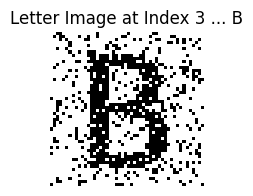

  Predicted: D, Actual: B


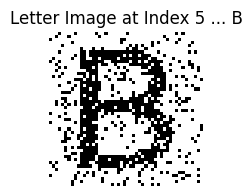

  Predicted: D, Actual: B


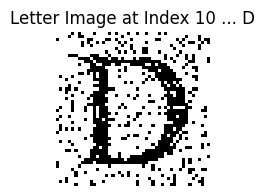

  Predicted: B, Actual: D


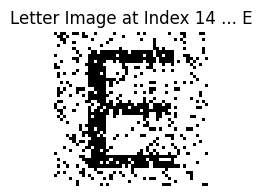

  Predicted: D, Actual: E


In [19]:
outputs = perceptron.forward(inputs_noisy)

# Find misclassified letters
misc = misclassified_indices(true_outputs, outputs)
outputs = perceptron.forward(inputs_noisy)

# Visualize misclassified letters
print("Misclassified Letters:")
for index in misc:
    visualize_letter(inputs_noisy, labels, index)
    predicted_class = np.argmax(outputs[index]) + 1  # Get predicted class index (add 1 to adjust for 1-based indexing)
    print(f"  Predicted: {label_to_letter(predicted_class)}, Actual: {label_to_letter(labels[index])}")

- train with cross-entropy

Gradient Descent Iterative:
Epoch: 0, MSE: 0.3799 CE: -7.8771  Average of Weights: 0.0005635443919051496  Learning rate: 0.0010
The training ended after 32 epochs. Minimum error reached.


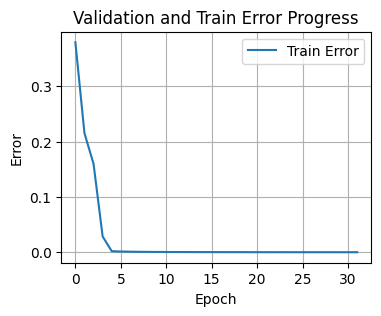


Experiment Results:


,Epochs,MSE,Accuracy,Sum Accuracy,Test MSE,Test Accuracy,Test MSE2,Test Accuracy2,Time,Variant,Learning Rate,Adaptive Learning Rate,Activation Function,Init Method,Max Epochs,Data Description
0,1098.0,0.000100,1.0,1,0.431522,0.733333,0.431522,0.733333,4.660417,iterative,0.001,False,tanh,random,5000,Letter classification
1,32.0,0.000096,1.0,1,0.698786,0.666667,0.698786,0.666667,0.499007,iterative,0.001,False,tanh,random,5000,Letter classification


In [20]:
alpha = 0.5       # level of noise in the testing data

np.random.seed(47876)
# Preprocess the data:
[inputs, labels] = load_letter_data()

mask = (labels == 1) | (labels == 2) | (labels == 3) | (labels == 4)| (labels == 5)  # we train just 5  letters
inputs = inputs[mask]
labels = labels[mask]

[inputs_noisy, inputs_denoised] = add_noise(inputs, alpha=alpha)
true_outputs = one_hot_encode(labels)
training_data = (inputs, true_outputs)


testing_data = (inputs_noisy, true_outputs)
validation_data = None
testing_data2 = (inputs_denoised, true_outputs)
data_description = "Letter classification"

# Set Perceptron parameters:
weights = np.zeros(inputs.shape[1])
bias = 0
activation = 'tanh'
init_method = 'random'
epochs = 5000
learning_rate = 0.001
adaptive_learning_rate = False
min_error = 0.0001
print_progress = True
variant ='iterative' # 'batch' # 'batch' 'iterative'
max_validation_steps = 30
error_name = 'cross-entropy'

# run the experiment:
#for learning_rate in [0.0001, 0.001, 0.01, 0.1, 1]:

perceptron = run_example_multiple_times_classification(experiment_results_let, training_data, testing_data, testing_data2, validation_data, activation, epochs, init_method, learning_rate, print_progress, variant, data_description, adaptive_learning_rate, min_error, error_name, max_validation_steps, num_runs=1)

print("\nExperiment Results:")
experiment_results_let

### 10 letters
- compare SSE and cross-entropy
- compare the batch and iterative algorithm

Gradient Descent Iterative:
Epoch: 0, MSE: 0.6078 CE: -19.7235  Average of Weights: 0.0010944424619866065  Learning rate: 0.0001
Epoch: 100, MSE: 0.0017 CE: -23.9224  Average of Weights: 0.0015381626625924482  Learning rate: 0.0001
Epoch: 200, MSE: 0.0004 CE: -24.1432  Average of Weights: 0.001664445600426355  Learning rate: 0.0001
Epoch: 300, MSE: 0.0002 CE: -24.2177  Average of Weights: 0.0017393879406983868  Learning rate: 0.0001
Epoch: 400, MSE: 0.0001 CE: -24.2555  Average of Weights: 0.001792846359712485  Learning rate: 0.0001
The training ended after 420 epochs. Minimum error reached.


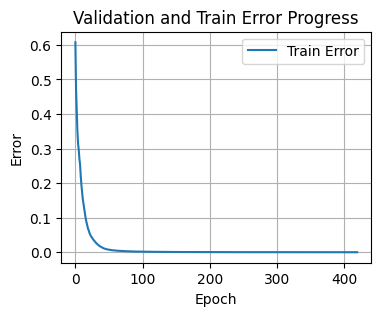


Experiment Results:


,Epochs,MSE,Accuracy,Sum Accuracy,Test MSE,Test Accuracy,Test MSE2,Test Accuracy2,Time,Variant,Learning Rate,Adaptive Learning Rate,Activation Function,Init Method,Max Epochs,Data Description
0,1098.0,0.000100,1.0,1,0.431522,0.733333,0.431522,0.733333,4.660417,iterative,0.0010,False,tanh,random,5000,Letter classification
1,32.0,0.000096,1.0,1,0.698786,0.666667,0.698786,0.666667,0.499007,iterative,0.0010,False,tanh,random,5000,Letter classification
2,420.0,0.000100,1.0,1,0.287859,0.666667,0.287859,0.666667,9.214927,iterative,0.0001,False,tanh,random,10000,Letter classification


In [21]:
alpha = 0.3       # level of noise in the testing data

np.random.seed(47876)
# Preprocess the data:
[inputs, labels] = load_letter_data()

mask = (labels == 1) | (labels == 2) | (labels == 3) | (labels == 4)| (labels == 5) | (labels == 6) | (labels == 7) | (labels == 8) | (labels == 9)| (labels == 10)
inputs = inputs[mask]
labels = labels[mask]

[inputs_noisy, inputs_denoised] = add_noise(inputs, alpha=alpha)
true_outputs = one_hot_encode(labels)
training_data = (inputs, true_outputs)


testing_data = (inputs_noisy, true_outputs)
validation_data = None
testing_data2 = (inputs_denoised, true_outputs)
data_description = "Letter classification"

# Set Perceptron parameters:
weights = np.zeros(inputs.shape[1])
bias = 0
activation = 'tanh'
init_method = 'random'
epochs = 10000
learning_rate = 0.0001
adaptive_learning_rate = False
min_error = 0.0001
print_progress = True
variant = 'iterative' # 'batch' # 'batch' 'iterative'
max_validation_steps = 30
error_name = 'cross-entropy' # 'SSE'# 'cross-entropy'

# run the experiment:
#for learning_rate in [0.0001, 0.001, 0.01, 0.1, 1]:

perceptron = run_example_multiple_times_classification(experiment_results_let, training_data, testing_data, testing_data2, validation_data, activation, epochs, init_method, learning_rate, print_progress, variant, data_description, adaptive_learning_rate, min_error, error_name, max_validation_steps, num_runs=1)

print("\nExperiment Results:")
experiment_results_let

Misclassified Letters:


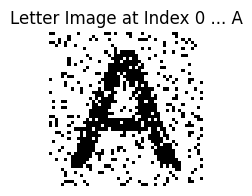

  Predicted: H, Actual: A


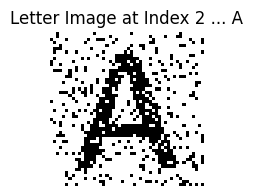

  Predicted: F, Actual: A


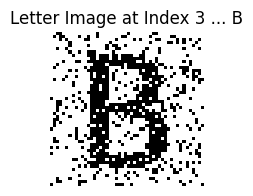

  Predicted: J, Actual: B


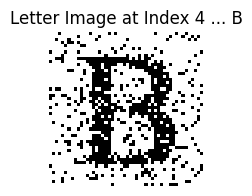

  Predicted: C, Actual: B


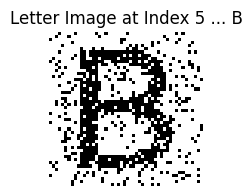

  Predicted: E, Actual: B


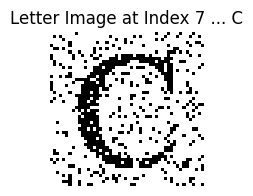

  Predicted: G, Actual: C


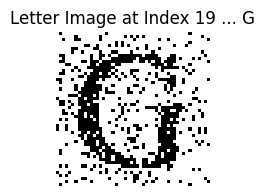

  Predicted: C, Actual: G


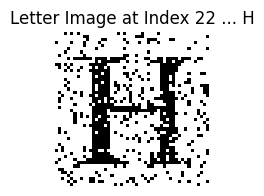

  Predicted: F, Actual: H


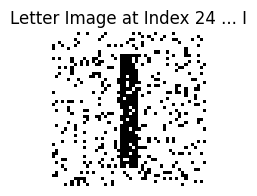

  Predicted: J, Actual: I


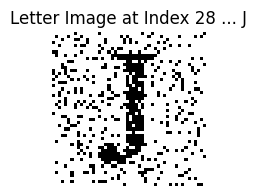

  Predicted: F, Actual: J


In [22]:
outputs = perceptron.forward(inputs_noisy)

# Find misclassified letters
misc = misclassified_indices(true_outputs, outputs)
outputs = perceptron.forward(inputs_noisy)

# Visualize misclassified letters
print("Misclassified Letters:")
for index in misc:
    visualize_letter(inputs_noisy, labels, index)
    predicted_class = np.argmax(outputs[index]) + 1  # Get predicted class index (add 1 to adjust for 1-based indexing)
    print(f"  Predicted: {label_to_letter(predicted_class)}, Actual: {label_to_letter(labels[index])}")

In [23]:
Y = perceptron.forward(inputs_noisy)
D = true_outputs

err = np.abs(D - Y)
print(misclassified_indices(true_outputs, Y), accuracy(D, Y))
print( np.sum(D >0.98, axis=0), np.sum(D <-0.98, axis=0))
print( np.sum(Y >0.098, axis=0), np.sum(Y <-0.098, axis=0))

[ 0  2  3  4  5  7 19 22 24 28] 0.6666666666666666
[3 3 3 3 3 3 3 3 3 3] [27 27 27 27 27 27 27 27 27 27]
[2 4 5 4 3 5 2 6 2 5] [27 26 25 24 27 22 28 24 27 23]


### All letters

Gradient Descent Iterative:
Epoch: 0, MSE: 0.2780 CE: -80.2295  Average of Weights: 0.0012363355724272233  Learning rate: 0.0001
Epoch: 100, MSE: 0.0008 CE: -84.8416  Average of Weights: 0.0019799700258672703  Learning rate: 0.0001
Epoch: 200, MSE: 0.0002 CE: -85.1379  Average of Weights: 0.0021458604903375027  Learning rate: 0.0001
The training ended after 296 epochs. Minimum error reached.


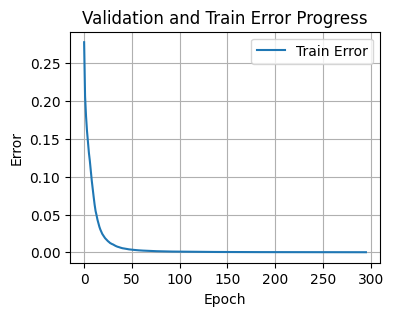


Experiment Results:


,Epochs,MSE,Accuracy,Sum Accuracy,Test MSE,Test Accuracy,Test MSE2,Test Accuracy2,Time,Variant,Learning Rate,Adaptive Learning Rate,Activation Function,Init Method,Max Epochs,Data Description
0,1098.0,0.000100,1.0,1,0.431522,0.733333,0.431522,0.733333,4.660417,iterative,0.0010,False,tanh,random,5000,Letter classification
1,32.0,0.000096,1.0,1,0.698786,0.666667,0.698786,0.666667,0.499007,iterative,0.0010,False,tanh,random,5000,Letter classification
2,420.0,0.000100,1.0,1,0.287859,0.666667,0.287859,0.666667,9.214927,iterative,0.0001,False,tanh,random,10000,Letter classification
3,296.0,0.000100,1.0,1,0.211418,0.487179,0.211418,0.487179,12.847715,iterative,0.0001,False,tanh,random,10000,Letter classification


In [24]:
alpha = 0.3       # level of noise in the testing data

np.random.seed(47876)
# Preprocess the data:
[inputs, labels] = load_letter_data()


[inputs_noisy, inputs_denoised] = add_noise(inputs, alpha=alpha)
true_outputs = one_hot_encode(labels)
training_data = (inputs, true_outputs)


testing_data = (inputs_noisy, true_outputs)
validation_data = None
testing_data2 = (inputs_denoised, true_outputs)
data_description = "Letter classification"

# Set Perceptron parameters:
weights = np.zeros(inputs.shape[1])
bias = 0
activation = 'tanh'
init_method = 'random'
epochs = 10000
learning_rate = 0.0001
adaptive_learning_rate = False
min_error = 0.0001
print_progress = True
variant = 'iterative' # 'batch' # 'batch' 'iterative'
max_validation_steps = 30
error_name = 'cross-entropy' # 'SSE'# 'cross-entropy'

# run the experiment:
#for learning_rate in [0.0001, 0.001, 0.01, 0.1, 1]:

perceptron = run_example_multiple_times_classification(experiment_results_let, training_data, testing_data, testing_data2, validation_data, activation, epochs, init_method, learning_rate, print_progress, variant, data_description, adaptive_learning_rate, min_error, error_name, max_validation_steps, num_runs=1)

print("\nExperiment Results:")
experiment_results_let